# **Introduction**

Academic performance is a key indicator of student success and institutional effectiveness. Understanding the factors that influence students’ exam scores can help educational institutions improve learning outcomes and provide targeted academic support. With the increasing availability of student-related data, predictive analytics has become an important tool for analyzing academic performance.

This project applies regression modeling techniques to analyze a student performance dataset where Exam Score is the target variable. The objective is to identify the key factors that significantly impact exam results and to predict students’ exam scores based on various academic and behavioral attributes. By using multiple regression models and evaluating their performance, the study aims to select the most effective model for accurate prediction.

The insights generated from this analysis can support data-driven decision making in education, enabling institutions to identify at-risk students, optimize resource allocation, and enhance overall academic performance.

# **Step 1: Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#**Step 2: Load Dataset**

In [2]:
# Load the uploaded dataset
data = pd.read_csv('/content/Student Perfomance.csv')

# Check the first few rows
data.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


#**Data Cleaning**

In [3]:
# Display the first few rows of the dataset to understand its structure
data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
data.shape

(1000, 16)

In [5]:
# Check Null Values
data.isnull().values.any()

np.True_

In [6]:
print("There is {} missing values in data frame".format(data.isnull().sum().sum()))

There is 91 missing values in data frame


In [7]:
len(data.columns)

16

In [8]:
data.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


# **Visualization & Insights**

In [9]:
# Define columns to plot: exclude categorical columns
numerical_columns = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency','mental_health_rating', 'exam_score']

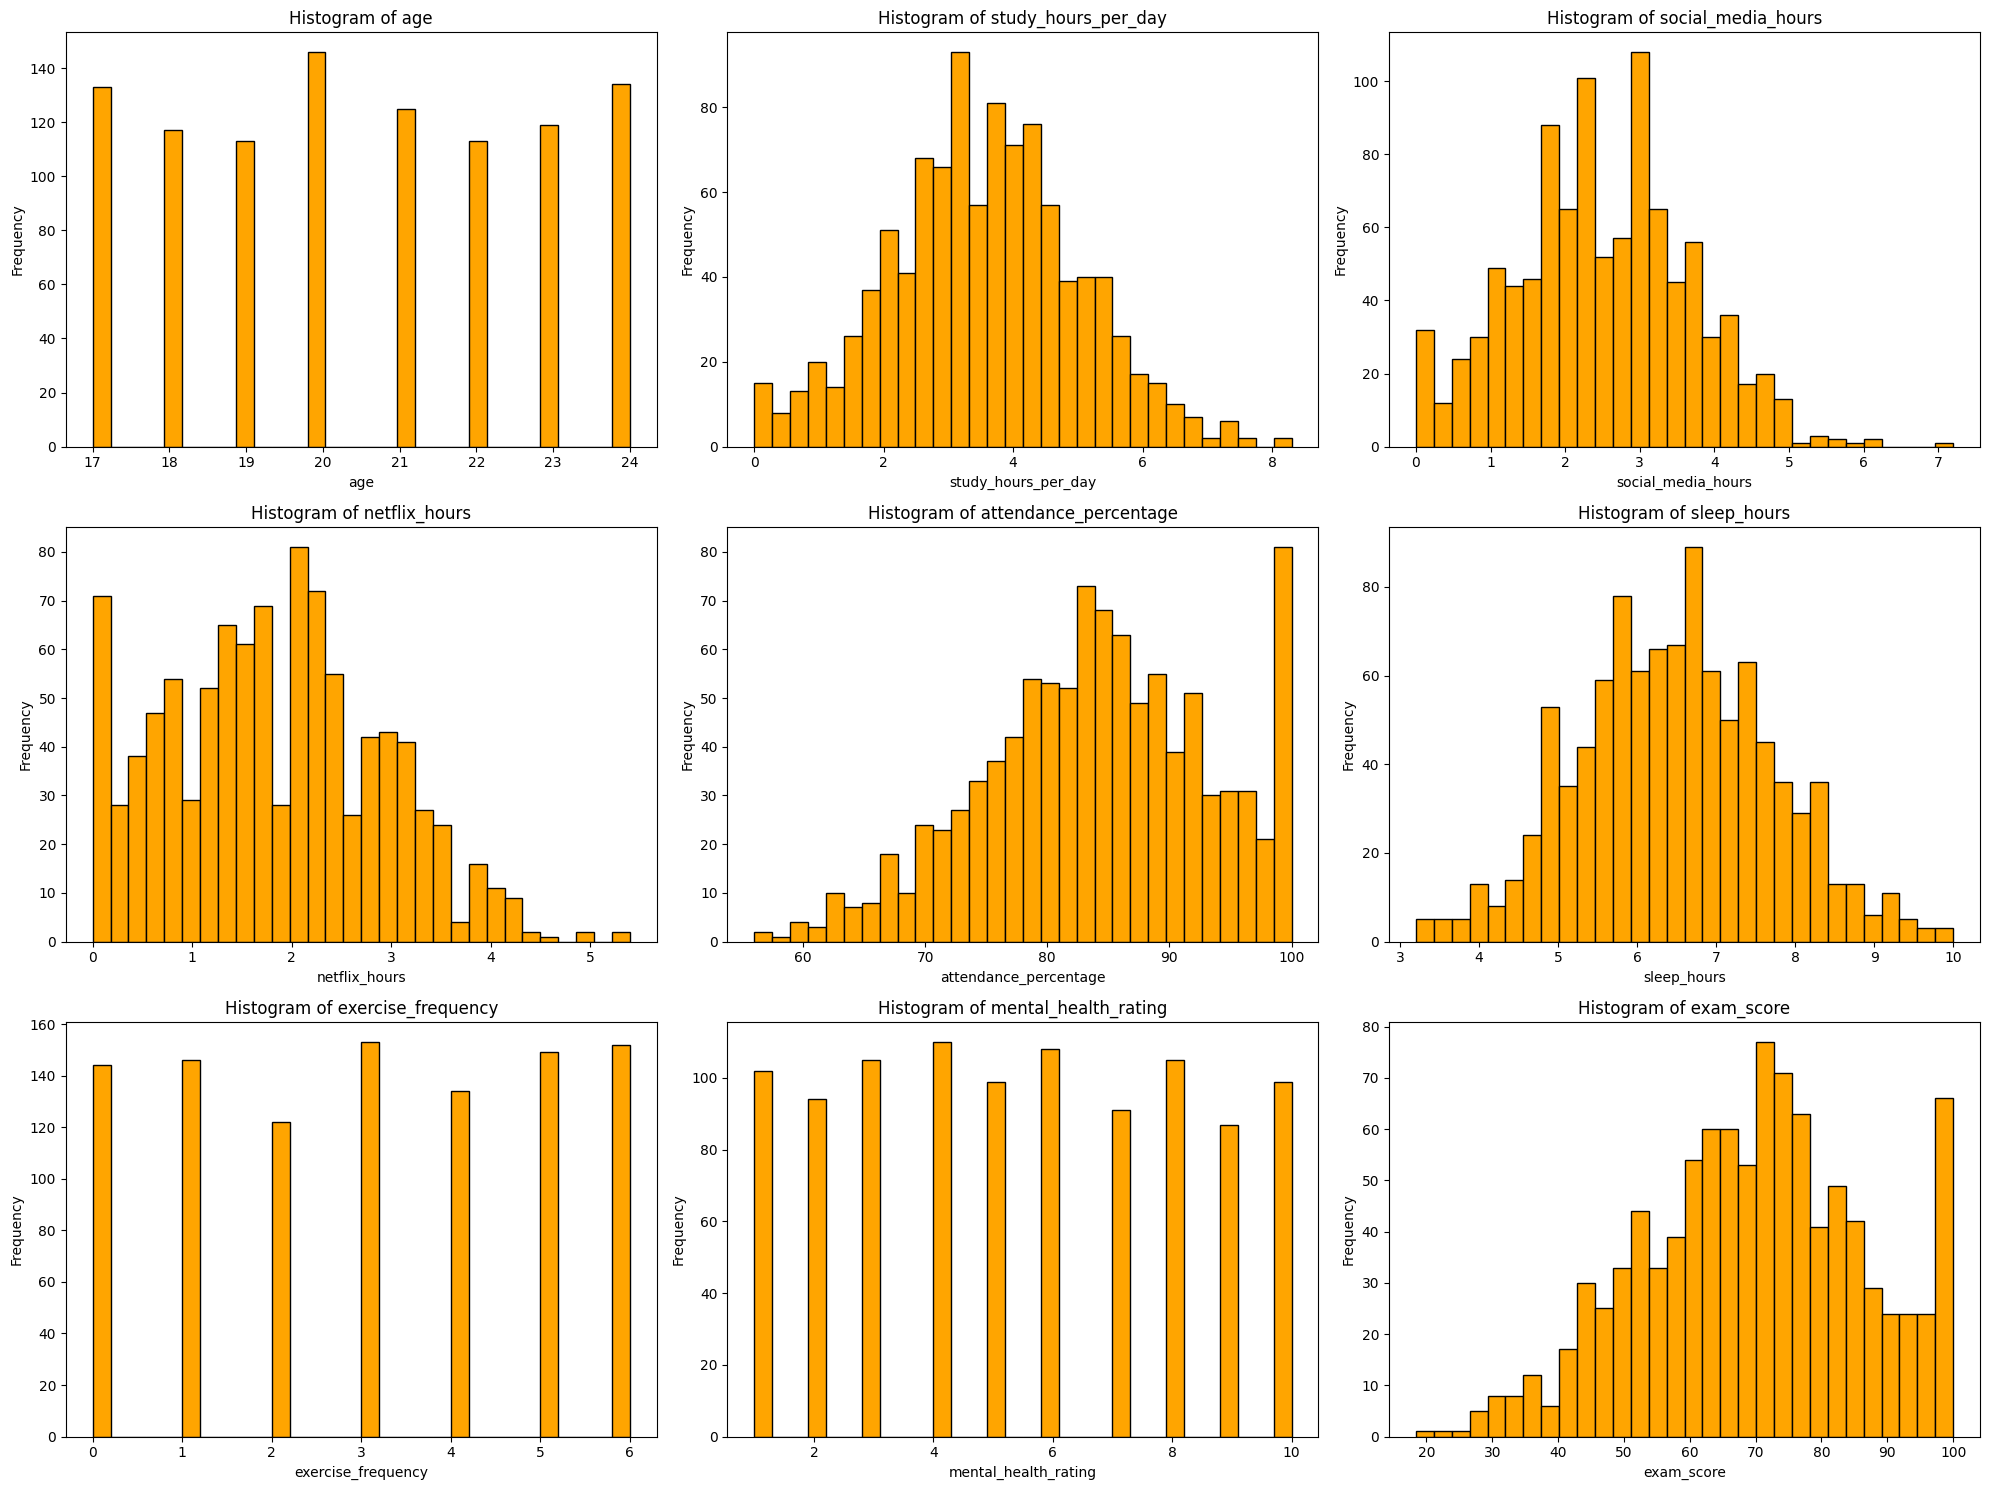

In [10]:
# Create a 2x2 grid for the plots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Loop through the numerical columns and plot the histograms and column charts
for i, column in enumerate(numerical_columns):
    # Plot histogram
    axes[i].hist(data[column], bins=30, color='orange', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

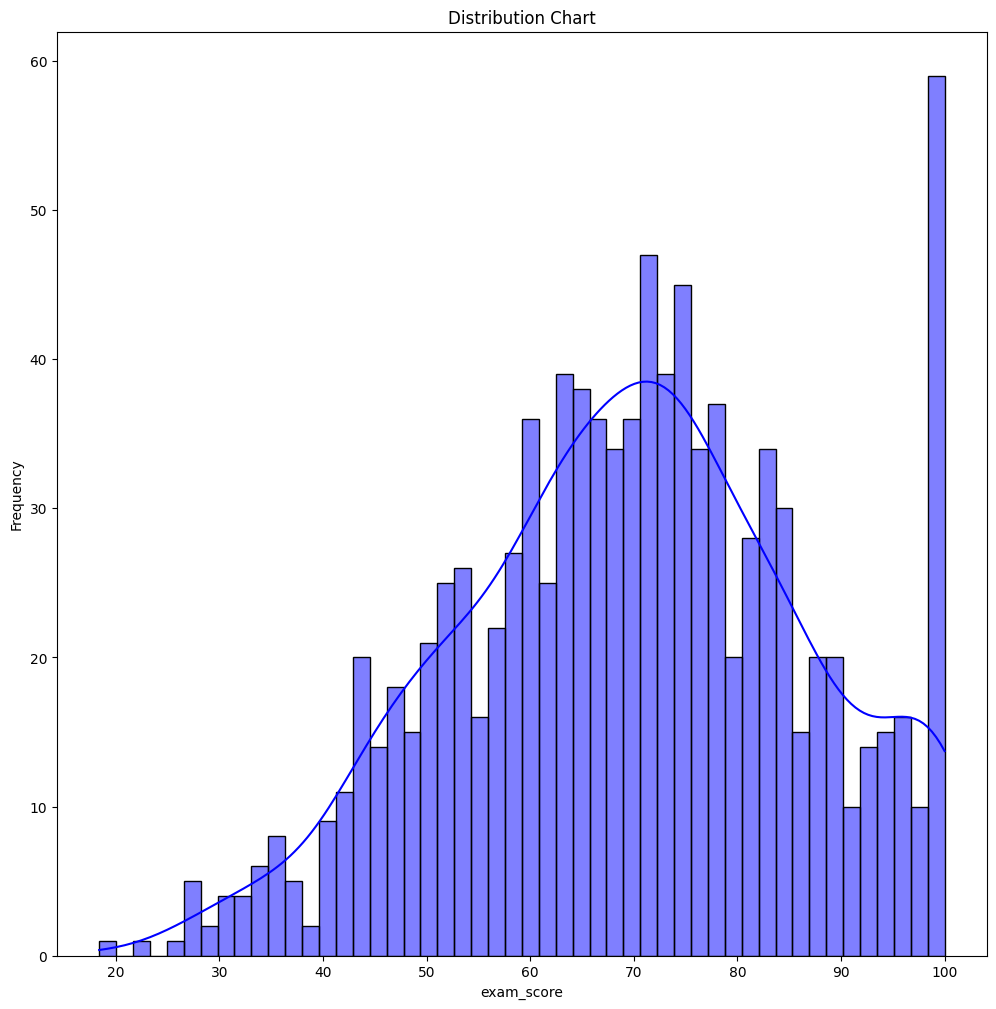

In [11]:
# Check distribution of the target variable
plt.figure(figsize=(12, 12))
sns.histplot(data['exam_score'], kde=True, color='blue', bins=50)
plt.title('Distribution Chart')
plt.xlabel('exam_score')
plt.ylabel('Frequency')
plt.show()

In [12]:
correlation_matrix = data.corr(numeric_only=True)

In [13]:
correlation_matrix

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907
study_hours_per_day,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419
social_media_hours,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733
netflix_hours,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779
attendance_percentage,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836
sleep_hours,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683
exercise_frequency,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107
mental_health_rating,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523
exam_score,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000


# **Correlation Heatmap**

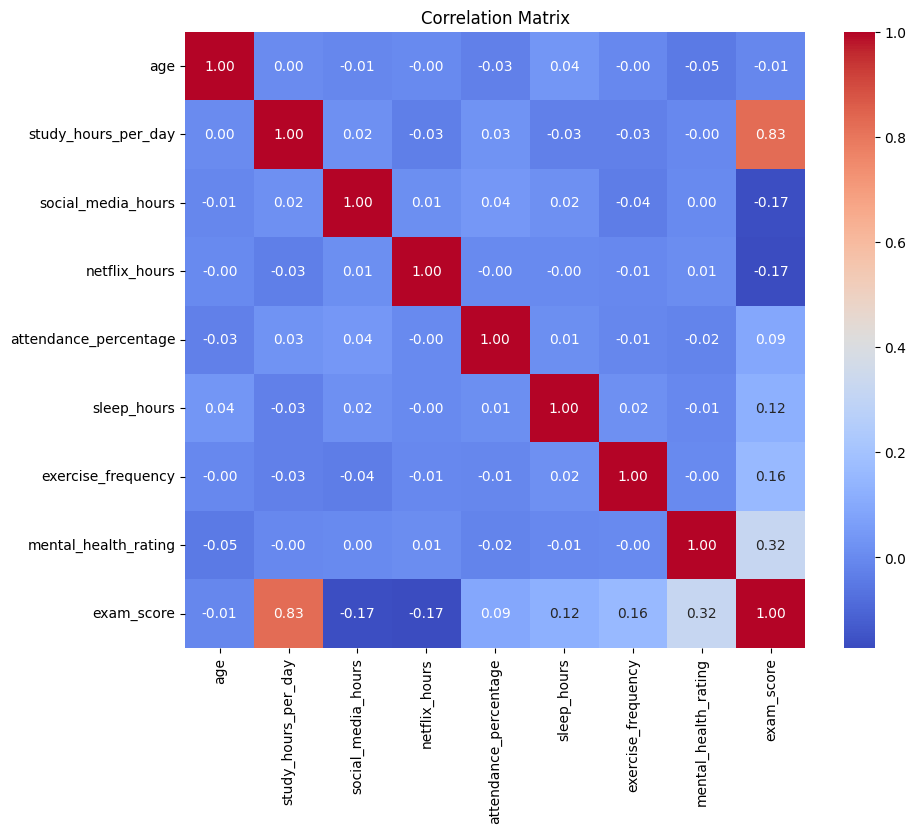

In [14]:
# Check correlations between numeric variables
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#**Data Preprocessing**

In [15]:
# One-hot encoding for categorical column
encoder = OneHotEncoder(sparse_output=False)
encoded_df = pd.DataFrame(encoder.fit_transform(data[['parental_education_level']]), columns=encoder.get_feature_names_out(['parental_education_level']))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
all_data = pd.concat([numeric_data, encoded_df], axis=1)

In [16]:
# Now calculate correlations again
correlation_matrix = all_data.corr()

In [17]:
# Check Null Values
all_data.isnull().values.any()

np.False_

In [18]:
# Check for missing values
missing_values = all_data.isnull().sum()

In [19]:

missing_values

,0
age,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
attendance_percentage,0
sleep_hours,0
exercise_frequency,0
mental_health_rating,0
exam_score,0
parental_education_level_Bachelor,0


In [20]:
all_data.shape

(1000, 13)

In [21]:
len(all_data.columns)

13

In [22]:
all_data.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,parental_education_level_Bachelor,parental_education_level_High School,parental_education_level_Master,parental_education_level_nan
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500,0.350000,0.392000,0.167000,0.091000
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564,0.477208,0.488441,0.373162,0.287753
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000,0.000000,0.000000,0.000000,0.000000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000,0.000000,0.000000,0.000000,0.000000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000,0.000000,0.000000,0.000000,0.000000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000,1.000000,1.000000,0.000000,0.000000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# Prepare the features (X) and target (y)
X = all_data.drop(columns=['exam_score'])
y = all_data['exam_score']

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Train-Test Split**

In [25]:
# Step 5: Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#**Regression Model Development**

In [26]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"MAE: {mae_lr}, MSE: {mse_lr}, RMSE: {rmse_lr}, MAPE: {mape_lr}, R²: {r2_lr}")

MAE: 4.147868724492358, MSE: 26.15429158298369, RMSE: 5.114126668648685, MAPE: 0.06878874696269924, R²: 0.8980057567921867


#**Model Training**

In [27]:
# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"MAE: {mae_lasso}, MSE: {mse_lasso}, RMSE: {rmse_lasso}, MAPE: {mape_lasso}, R²: {r2_lasso}")

MAE: 4.6330153124500955, MSE: 33.25955455227953, RMSE: 5.76710972258024, MAPE: 0.07969481487902472, R²: 0.8702972670765897


#**Model Evaluation & Comparison**

In [28]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, MAPE: {mape_rf}, R²: {r2_rf}")

MAE: 4.959720000000001, MSE: 38.67270617000001, RMSE: 6.218738310139767, MAPE: 0.08327266842349493, R²: 0.8491875267929814


# **Models With Optimization**

In [29]:
# Linear Regression (fit_intercept)
param_grid_linear = {'fit_intercept': [True, False]}
grid_search_lr = GridSearchCV(LinearRegression(), param_grid_linear, cv=5, scoring='neg_mean_absolute_error')
grid_search_lr.fit(X_train, y_train)
y_pred_lr_opt = grid_search_lr.best_estimator_.predict(X_test)

mae_lr_opt = mean_absolute_error(y_test, y_pred_lr_opt)
mse_lr_opt = mean_squared_error(y_test, y_pred_lr_opt)
rmse_lr_opt = np.sqrt(mse_lr_opt)
mape_lr_opt = mean_absolute_percentage_error(y_test, y_pred_lr_opt)
r2_lr_opt = r2_score(y_test, y_pred_lr_opt)
print(f"MAE: {mae_lr_opt}, MSE: {mse_lr_opt}, RMSE: {rmse_lr_opt}, MAPE: {mape_lr_opt}, R²: {r2_lr_opt}")

MAE: 4.147868724492358, MSE: 26.15429158298369, RMSE: 5.114126668648685, MAPE: 0.06878874696269924, R²: 0.8980057567921867


In [30]:
# Lasso Regression
param_grid_lasso = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_absolute_error')
grid_search_lasso.fit(X_train, y_train)
y_pred_lasso_opt = grid_search_lasso.best_estimator_.predict(X_test)

mae_lasso_opt = mean_absolute_error(y_test, y_pred_lasso_opt)
mse_lasso_opt = mean_squared_error(y_test, y_pred_lasso_opt)
rmse_lasso_opt = np.sqrt(mse_lasso_opt)
mape_lasso_opt = mean_absolute_percentage_error(y_test, y_pred_lasso_opt)
r2_lasso_opt = r2_score(y_test, y_pred_lasso_opt)
print(f"MAE: {mae_lasso_opt}, MSE: {mse_lasso_opt}, RMSE: {rmse_lasso_opt}, MAPE: {mape_lasso_opt}, R²: {r2_lasso_opt}")

MAE: 4.154056051989464, MSE: 26.213522409999868, RMSE: 5.119914297134266, MAPE: 0.06913636366131717, R²: 0.8977747735381797


In [31]:
# Random Forest
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_absolute_error')
grid_search_rf.fit(X_train, y_train)
y_pred_rf_opt = grid_search_rf.best_estimator_.predict(X_test)

mae_rf_opt = mean_absolute_error(y_test, y_pred_rf_opt)
mse_rf_opt = mean_squared_error(y_test, y_pred_rf_opt)
rmse_rf_opt = np.sqrt(mse_rf_opt)
mape_rf_opt = mean_absolute_percentage_error(y_test, y_pred_rf_opt)
r2_rf_opt = r2_score(y_test, y_pred_rf_opt)
print(f"MAE: {mae_rf_opt}, MSE: {mse_rf_opt}, RMSE: {rmse_rf_opt}, MAPE: {mape_rf_opt}, R²: {r2_rf_opt}")

MAE: 4.943889999999997, MSE: 38.12696698499996, RMSE: 6.1747037973493075, MAPE: 0.08259980945969655, R²: 0.85131575324432


# **Visualization of Linear Regression**

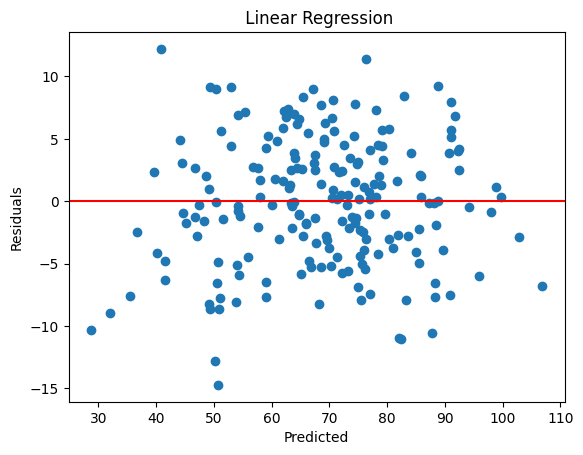

In [32]:
residuals = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title(" Linear Regression")
plt.show()

# **Actual vs Predicted of LR**

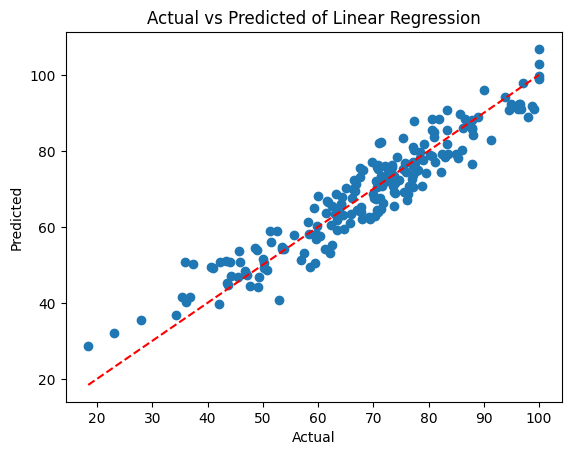

In [33]:
# Actual vs Predicted
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted of Linear Regression")
plt.show()

# **Compare and Choose the Best Regression Model**

In [34]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

# Store model results
results = []

# Define the models dictionary using the already trained models
models = {
    'Linear': linear_model,
    'Lasso': lasso_model,
    'Random Forest': rf_model,
    'Optimized Linear': grid_search_lr.best_estimator_,
    'Optimized Lasso': grid_search_lasso.best_estimator_,
    'Optimized RF': grid_search_rf.best_estimator_
}

for name, model in models.items():
    # Models are already fitted in previous steps, so fitting again is not necessary
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred);
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        "Model": name,
        "R2 Score (Accuracy)": r2,
        "RMSE": rmse,
        "MAE": mae
    })

# Create comparison table
results_df = pd.DataFrame(results)
results_df.sort_values(by="R2 Score (Accuracy)", ascending=False)

,Model,R2 Score (Accuracy),RMSE,MAE
0,Linear,0.898006,5.114127,4.147869
3,Optimized Linear,0.898006,5.114127,4.147869
4,Optimized Lasso,0.897775,5.119914,4.154056
1,Lasso,0.870297,5.767110,4.633015
5,Optimized RF,0.851316,6.174704,4.943890
2,Random Forest,0.849188,6.218738,4.959720


# **Select the Best Model Automatically**

In [35]:
# Select best model based on highest R2 score
best_model_name = results_df.sort_values(
    by="R2 Score (Accuracy)", ascending=False
).iloc[0]["Model"]

best_model = models[best_model_name]

print("Best Model Selected:", best_model_name)

Best Model Selected: Linear


# **Train Best Model & Show Accuracy**

In [36]:
# Train best model on full training data
best_model.fit(X_train, y_train)

# Predict again
best_pred = best_model.predict(X_test)

best_r2 = r2_score(y_test, best_pred)

print("Best Model R2 Score (Accuracy):", round(best_r2, 4))

Best Model R2 Score (Accuracy): 0.898


# **Deploy the Model with Unknown Datas**

In [37]:

unknown_data_raw = pd.DataFrame({
    'age': [20],
    'study_hours_per_day': [5.0],
    'social_media_hours': [2.0], # Example value
    'netflix_hours': [1.5], # Example value
    'attendance_percentage': [90.0], # Example value
    'sleep_hours': [7.0], # Example value
    'exercise_frequency': [3], # Example value
    'mental_health_rating': [7], # Example value
    'parental_education_level_Bachelor': [1.0], # Example: Assume parent has Bachelor
    'parental_education_level_High School': [0.0], # Example: Other education levels are 0
    'parental_education_level_Master': [0.0], # Example: Other education levels are 0
    'parental_education_level_nan': [0.0] # Example: No missing parental education
})


# Get the feature names from the original X before scaling
original_X_columns = all_data.drop(columns=['exam_score']).columns

# Reindex unknown_data_raw to ensure correct column order
unknown_data_raw = unknown_data_raw[original_X_columns]

# Scale the unknown data using the SAME scaler object used for training
unknown_data_scaled = scaler.transform(unknown_data_raw)

# Predict using trained best model
unknown_prediction = best_model.predict(unknown_data_scaled)

print("Prediction for unknown data:", unknown_prediction[0])

Prediction for unknown data: 90.7762647243812


# **Save the Best Model**

In [39]:
# Predict using the best model that was already trained
new_predictions = best_model.predict(unknown_data_scaled)

new_predictions

array([90.77626472])

# **Business Insights and Recommendations**



**Key Predictors and Their Impact**

The regression model indicates that academic and behavioral variables have a significant impact on Exam Score. Factors such as study time, attendance, prior academic performance, and learning engagement show a strong positive relationship with exam results. This means that as these variables increase, the predicted exam score also increases. Conversely, variables related to distractions, low preparation, or irregular study habits negatively affect exam performance. The model highlights that consistent academic effort is a key driver of higher exam scores.

# **How Institutions Can Use the Model’s Outcomes**

Educational institutions can use the model to predict student exam performance in advance and take preventive actions. By identifying students with lower predicted exam scores, universities can:


*   Provide early academic support and tutoring
*   Design targeted intervention programs


*   Improve course planning and instructional methods
*   Allocate resources efficiently to high-risk students















# **Limitations and Areas for Improvement**

The model’s accuracy depends on the quality and completeness of the student data. Factors such as mental health, exam difficulty, or external stress, which are not included in the dataset, may also influence exam scores. Additionally, the model assumes stable relationships between predictors and exam scores, which may vary across semesters or institutions.

**Future improvements may include:**


*   Adding behavioral and psychological variables

*   Increasing dataset size across multiple semesters
*   Applying feature engineering to capture nonlinear patterns


*   Regularly retraining the model with updated student data










# **Conclusion**

The regression model effectively identifies key factors influencing exam scores and provides actionable insights for improving student performance. With enhanced data and continuous updates, the model can serve as a reliable academic decision-support tool.